In [1]:
#! pip install chart_studio
#! pip install bqplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
from   scipy import stats
import locale

# <span style="color:rgb(50,100,100);"><strong>&#128304; Estructurando un Proyecto de DS (parte I) &#128304;</strong></span>

<em> Deberás entregar el tercer avance de tu proyecto final. Crearás un notebook que deberá tener en primera instancia un abstract (250/500 palabras) de acuerdo al dataset elegido del desafío “Visualizaciones en Python”. Además se deben establecer las preguntas e hipótesis de interés sobre el dataset elegido. Finalmente, deberás generar visualizaciones (univariadas, bivariadas o multivariadas) junto con resúmenes numéricos acompañado de la interpretaciones respectivas que permitan responder la pregunta problema.
</em> 


### <u style="color: rgb(50,50,100);"><span style="color:rgb(50,50,100);"><strong><em>CONSIGNA</em></strong></span></u>

<span style= "color:black;">
Continuarás trabajando con base en lo realizado en el Desafío entregable: Visualización en Python, en esta oportunidad deberás complementar con lo siguiente:
  

&#11093; Generar preguntas de interés o hipótesis de interés sobre el dataset elegido para el proyecto final.
    
&#11093;Crear visualizaciones (univariados, bivariados o trivariados) junto con resúmenes numéricos básicos acordes con los tipos de variables disponibles.


&#11093;Interpretar los resultados obtenidos</span>


# <span style="color:rgb(50,100,100);"><strong>&#128304; PREGUNTAS &#128304;</strong></span>

&#11093;¿Cuál es el promedio de facturación diaria?

&#11093;¿Hay días con una facturación significativamente diferente al promedio?

&#11093;¿Hay una tendencia o patrón en la facturación diaria?

&#11093;¿La facturación está aumentando o disminuyendo con el tiempo?

&#11093;¿Hay una relación entre el día de la semana y la facturación?

&#11093;¿Hay días festivos que tengan un impacto significativo en la facturación?

&#11093;¿Existe una relación entre el mes y los precios?

&#11093;¿Existe una relación entre los días y los costos?

&#11093;¿Hay una relación entre el precio y los costos? 

&#11093;¿Hay algún mes en particular en el que los precios y los costos sean más altos o más bajos segun las provincias??



# <span style="color:rgb(50,100,100);"><strong>&#128304; Para las visualizaciones, podríamos crear:&#128304;</strong></span>

&#11093; Gráficos dispercion para visualizar la facturación/costos/margenes de ganancias de envios/bultos por semanal/dias con el tiempo

&#11093; Histogramas para visualizar la distribución de la facturación

&#11093; Boxplot para visualizar la presencia de outliers

&#11093; Gráficos de barras para comparar la facturación por día de la semana

&#11093; Análisis de correlación para explorar la relación entre la facturación y otras variables relevantes (por ejemplo, día de la semana, día festivo, etc.)



## <span style= "color:black;">&#9989; Carga de data set: Postal - Fuente: Personal + sintaxis utiles para calculos </span>

In [2]:
url_postal2022int='https://drive.google.com/file/d/1gpaF6HSvhXYo4cDyP1qzEGtw9qXcTcF-/view'
path_postal2022int= 'https://drive.google.com/uc?export=download&id='+ url_postal2022int.split('/')[-2]
postal=pd.read_csv(path_postal2022int, delimiter=";", encoding="latin-1", low_memory=False)

In [3]:
postal.columns


Index(['id', 'cliente_id', 'Empresa', 'tipo_operacion',
       'tipo_operacion_nombre', 'fecha_hora', 'fechaplanilla',
       'fecharendicion', 'fecha_hora_entrega', 'fechaUltimoEstado',
       'fecha_ultimo_estado', 'servicio_codigo', 'servicio', 'grupo',
       'codigo_estado', 'estado', 'peso', 'bultos', 'bulto_por_peso_final',
       'peso_volumetrico', 'kg_exceso', 'precio', 'costo_distribuidor',
       'costo_interno', 'costo_transporte', 'costo_despacho_a_expreso',
       'costo_servicio_retorno', 'costo_por_monitoreo_activo',
       'costo_adicional1', 'costo_adicional2', 'costo_adicional3',
       'totalFlete', 'importe_urgente', 'importe_exceso', 'is_foto',
       'is_firma', 'destino_cp', 'destino_localidad', 'destino_provincia',
       'destino_Latitud', 'destino_Longitud', 'destino_zona', 'destino_Region',
       'origen_cp', 'origen_Latitud', 'origen_Longitud', 'origen_zona',
       'origen_Region', 'origen_localidad', 'origen_provincia'],
      dtype='object')

In [ ]:
#modifico lo mal escrito
postal['destino_provincia']= postal['destino_provincia'].replace(["Buenos Aires"], ["BUENOS AIRES"])



In [ ]:
#Agregar una columna 'valor_constante' con el valor 1 en cada fila para poder sumar la cantidad de Guias Remitos
postal = postal.assign(valor_constante = 1)



In [ ]:
# convierto la columna 'fecha' a tipo fecha, la clono y luego creo otra con el datos solamente dd-mm-yy
postal['fecha_hora_clonada'] = postal['fecha_hora']
postal['fecha_hora_clonada'] = pd.to_datetime(postal['fecha_hora'])
postal['fecha_hora_clonada_ddmmyy'] = postal['fecha_hora_clonada'].dt.date

#creo columna con nombre de mes y nombre
postal['Month'] = pd.to_datetime(postal['fecha_hora']).dt.month_name()
postal['mes'] = pd.to_datetime(postal['fecha_hora']).dt.month

#creo columna con el dia de la fecha y nombre
postal['day'] = pd.to_datetime(postal['fecha_hora']).dt.day_name()
postal['dia'] = pd.to_datetime(postal['fecha_hora']).dt.day

#creo columna con el numero de semana
postal['semana'] = pd.to_datetime(postal['fecha_hora']).dt.week


<ipython-input-5-a90eb0e3dd02>:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  postal['semana'] = pd.to_datetime(postal['fecha_hora']).dt.week


In [ ]:
#Remplazo la (,) por el (.) en la columna Precio
postal["precio"] = postal["precio"].str.replace(',', '.')

In [ ]:
# Transformo el tipo de dato a float64 y le indico que muestre 2 decimales
postal["precio"] = postal["precio"].astype(float)
postal["precio"] = round(postal["precio"], 2)

In [ ]:
#Remplazo la (,) por el (.) en las columnas costo
postal["costo_distribuidor"] = postal["costo_distribuidor"].str.replace(',', '.')
postal["costo_interno"] = postal["costo_interno"].str.replace(',', '.')
postal["costo_transporte"] = postal["costo_transporte"].str.replace(',', '.')
postal["totalFlete"] = postal["totalFlete"].str.replace(',', '.')


In [ ]:
# Transformo el tipo de dato a float64 y le indico que muestre 2 decimales
postal["costo_distribuidor"] = postal["costo_distribuidor"].astype(float)
postal["costo_interno"] = postal["costo_interno"].astype(float)
postal["costo_transporte"] = postal["costo_transporte"].astype(float)
postal["totalFlete"] = postal["totalFlete"].astype(float)
postal["costo_distribuidor"] = round(postal["costo_distribuidor"], 2)
postal["costo_interno"] = round(postal["costo_interno"], 2)
postal["costo_transporte"] = round(postal["costo_transporte"], 2)
postal["totalFlete"] = round(postal["totalFlete"], 2)

In [ ]:
#Creo una columna que represente el porcentaje de cada valor de 'precio' respecto al total de la columna.
precio_total = postal['precio'].sum()
postal['porcentaje_precio'] = 100 * postal['precio'] / precio_total


In [ ]:
# Crea una nueva columna que sume los costos
postal['total_costo'] = postal['costo_distribuidor'] + postal['costo_interno']+ postal['costo_transporte']+ postal['costo_despacho_a_expreso']+ postal['costo_servicio_retorno']+ postal['costo_por_monitoreo_activo']+ postal['costo_adicional1']+ postal['costo_adicional2']+ postal['costo_adicional3']


In [ ]:
#Creo una columna que represente el porcentaje de cada valor de 'costo total' respecto al precio de venta.
total_costo = postal['total_costo'].sum()
porcentaje_costo= postal['total_costo'] / postal['precio'] * 100
postal['porcentaje_costo'] = porcentaje_costo
postal['porcentaje_costo'] = round(porcentaje_costo, 2)


In [ ]:
# Crea una nueva columna que muestre la rentavilidad y el porcentaje de la rentavilidad sobre el precio de venta
postal['margen_ganancia'] = postal['precio'] - postal['total_costo']
rentabilidad = postal['margen_ganancia'] / postal['total_costo']
postal['rentabilidad'] = rentabilidad
rentabilidad_porcentaje = rentabilidad *100
postal['rentabilidad_porcentaje'] = round(rentabilidad_porcentaje, 2)

## <span style= "color:black;">&#9989; GROUPBY</span>

In [ ]:
# agrupo por Mes fecha
#grouped_MesFecha = postal.groupby(['Month','dia']).agg({'id':'count', 'bultos':'sum','precio':'sum','total_costo':'sum', 'margen_ganancia':'sum','rentabilidad_porcentaje':'mean'}).rename(columns={'id':'envios','total_costo':'costo'})
grouped_MesFecha2 = postal.groupby(['fecha_hora_clonada_ddmmyy']).agg({'id':'count', 'bultos':'sum','precio':'sum','total_costo':'sum', 'margen_ganancia':'sum'}).rename(columns={'id':'envios','total_costo':'costo'})

grouped_semana = postal.groupby(['semana']).agg({'id':'count', 'bultos':'sum','precio':'sum','total_costo':'sum', 'margen_ganancia':'sum'}).rename(columns={'id':'envios','total_costo':'costo'})
grouped_dia = postal.groupby(['semana']).agg({'id':'count', 'bultos':'sum','precio':'sum','total_costo':'sum', 'margen_ganancia':'sum'}).rename(columns={'id':'envios','total_costo':'costo'})
# Agrupo los datos por fecha y provincia
grouped = postal.groupby(['fecha_hora_clonada_ddmmyy','destino_provincia']).size().reset_index(name='cantidad_envios')

# agrupo las filas por fecha y cuento el número de filas por fecha para obtener la cantidad de envio diarios
fechas_conteo = postal.groupby(postal['fecha_hora_clonada'].dt.date).size()

In [ ]:
#Agrupo por mes y dia
grouped_MesFecha3 = postal.groupby(['Month','dia']).agg({'id':'count', 'bultos':'sum','precio':'sum','total_costo':'sum', 'margen_ganancia':'sum','rentabilidad_porcentaje':'mean'}).rename(columns={'id':'envios','total_costo':'costo'})
grouped_fecha = grouped_MesFecha3.reset_index()
grouped_fecha['text'] = grouped_fecha['Month'] + ' ' + grouped_fecha['dia'].astype(str)
text_column = grouped_fecha['text']

In [ ]:
#Agrupo por provincia y mes
#grouped_provmes = postal.groupby(['destino_provincia','Month']).agg({'id':'count', 'bultos':'sum','precio':'sum','total_costo':'sum', 'margen_ganancia':'sum'}).rename(columns={'id':'envios','total_costo':'costo','destino_provincia':'provincia'})
#grouped_prov = grouped_provmes.reset_index()
#grouped_prov['text'] = grouped_prov['destino_provincia'] + ' ' + grouped_prov['Month'].astype(str)
#text_column = grouped_prov['text']

In [ ]:
grouped_provmes = postal.groupby(['destino_provincia','Month']).agg({'id':'count', 'bultos':'sum','precio':'sum','total_costo':'sum', 'margen_ganancia':'sum','rentabilidad_porcentaje':'mean'}).reset_index().rename(columns={'id':'envios'})
grouped_prov = grouped_provmes.merge(postal, on=['destino_provincia', 'Month'], how='left')

In [ ]:
grouped_MesFecha = postal.groupby(['Month','dia']).agg({'id':'count', 'bultos':'sum','precio':'sum','total_costo':'sum', 'margen_ganancia':'sum','rentabilidad_porcentaje':'mean'}).reset_index().rename(columns={'id':'envios','total_costo':'costo'})
grouped_dia = grouped_MesFecha.merge(postal, on=['Month','dia'], how='left')

## <span style= "color:black;">&#9989; GRAFICAS </span>

&#11093;¿Hay una tendencia o patrón en la facturación diaria?

Podemos observar tanto en el GRAFICO 1 como en el GRAFICO 2, como fue la disprecion, podemos concluir que durante el año hubo picos de ingresos de mercaderia, el mayor pico se dio el 12-01-22 con un ingreso de 3004 bultos, mientras que el 2-06-2022 solo ingreso 1 bulto.Un detalle a tener en cuenta es que segun muestra el GRAFICO 2 el 12-01-22 el costo fue superior al margen de ganancia.

In [ ]:
import plotly.express as px

fig = px.scatter(grouped_MesFecha, x='bultos', y='margen_ganancia',hover_data=['rentabilidad_porcentaje','Month','dia'], color='bultos', size='envios', title='GRAFICO 1: Bultos por dia vs. margen_ganancia')

fig.update_layout(
    xaxis_title='bultos',
    yaxis_title='margen_ganancia',
    template='seaborn',
    title_x=0.5,
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    )
)

fig.show()

In [ ]:
px.scatter(grouped_MesFecha,x='envios', y=['precio', 'costo', 'margen_ganancia'],
           title='GRAFICO 2: Precio vs Costo vs Margen de Ganancia por dia', size='envios', color_discrete_sequence=['#ADD8E6','#FFA07A', '#90EE90'],
           render_mode='svg', trendline='lowess',template='presentation', hover_data=['bultos'] )


&#11093;¿La facturación está aumentando o disminuyendo con el tiempo?

En este grafico de dispercion segmentado por las semanas del año, podemos ver que hay una tendencia de incremento en la facturacion, si bien los precios acompañan la infacion, se puede observar que el margen de ganancia siempre es superior al costo.
Devemos observar que salvo en 1 oportunidad, la semana 27,  el costo supero la ganancia.

In [ ]:
px.scatter(grouped_semana,y=['precio', 'costo', 'margen_ganancia'],title='Precio vs Costo vs Margen de Ganancia por semana', size='envios', color_discrete_sequence=['#ADD8E6','#FFA07A', '#90EE90'], render_mode='svg', trendline='lowess',template='presentation', hover_data=['bultos'])



In [ ]:
fig = px.scatter(grouped_provmes, x="total_costo", y="precio", width = 1200, height = 800, color='destino_provincia' , size='bultos', hover_data=['envios','margen_ganancia','Month'], title="Precio vs Costo por Provincia", size_max=40, template='presentation')

def provincia_seleccionada(destino_provincia):
    fig.data[0].visible = grouped_prov['destino_provincia'] == destino_provincia
 
fig.show()

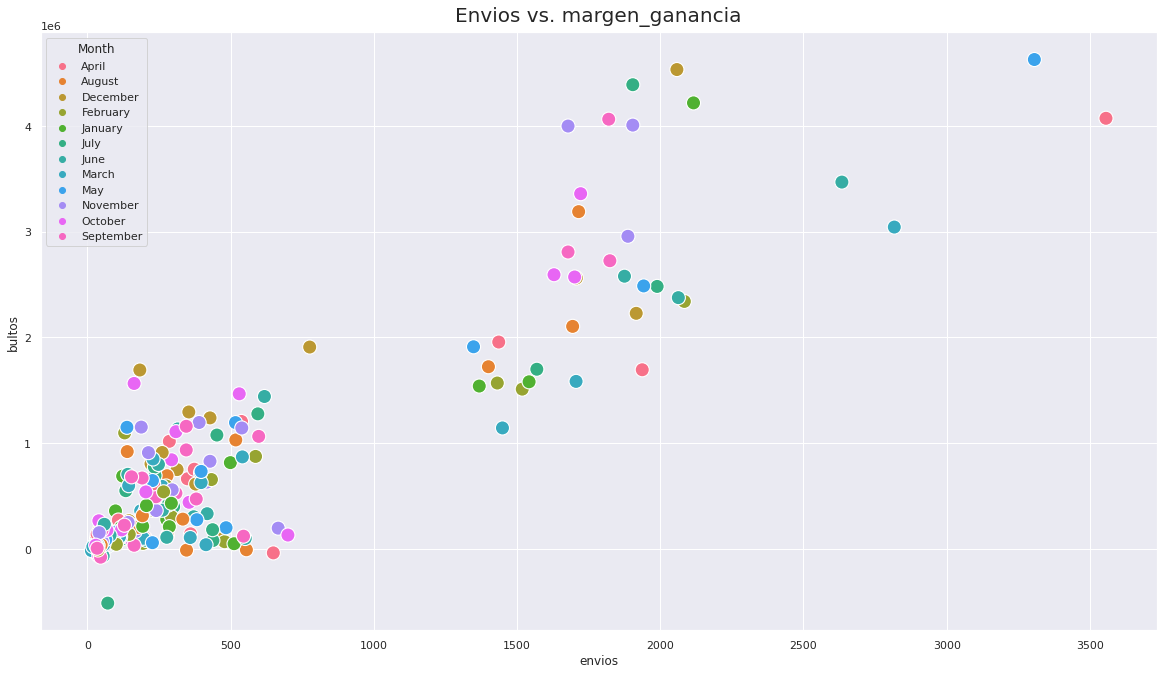

In [ ]:
sns.set(rc={'figure.figsize':(20,11)})
sns.scatterplot(data=grouped_provmes, x='envios', y='margen_ganancia',hue='Month',  s=200)
plt.title("Envios vs. margen_ganancia", fontsize=20, verticalalignment='bottom');
plt.xlabel("envios");
plt.ylabel("bultos");

In [ ]:
fig = px.scatter(grouped_MesFecha, x='costo', y='precio',hover_data=['rentabilidad_porcentaje','bultos'], color='envios', size='envios', title='Costo vs. Precio')

fig.update_layout(
    xaxis_title='costo',
    yaxis_title='precio',
    template='seaborn',
    title_x=0.5,
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    )
)

fig.show()

&#11093;¿Hay algún mes en particular en el que los precios y los costos sean más altos o más bajos segun las provincias?

En este grafico podemos ver y responder esta pregunta

In [ ]:

fig = px.scatter(grouped_provmes, x='destino_provincia', y='margen_ganancia', 
                width = 1500, height = 1000, color='Month',
                category_orders={"Month": ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}, 
                size='envios', size_max=60, hover_data=['bultos','envios'], title="Envios vs. margen_ganancia",  template='presentation')

fig.update_layout(
    xaxis_title='Provincias',
    yaxis_title='$$',
    template='seaborn',
    title_x=0.5,
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    )
)

fig.show()

# <span style="color:rgb(50,100,100);"><strong>&#128304; Interpretar los resultados obtenidos:&#128304;</strong></span>

La interpretación de los resultados dependera de los hallazgos específicos de cada visualización y análisis, pero en general, podemos responder las preguntas de interés y verificar las hipótesis formuladas.
Se encuentra que los precios y costos son más altos en un mes en particular, esto indica que hay una estacionalidad en los precios y costos. encontramos una relación positiva entre el precio y los costos, asi que a medida que los precios aumentan, los costos también aumentan. Asi tambien podemos observar valores atípicos en los datos.